In [86]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import griddata
from Theis_drawdown import ReadParams,ReadWells,TheisField


In [87]:
def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

,x,y,Q
0,-2.351141e+01,32.36068,691.2
1,-3.804226e+01,12.36068,691.2
2,-3.804226e+01,-12.36068,691.2
3,-2.351141e+01,-32.36068,691.2
4,-4.898587e-15,-40.00000,691.2
5,2.351141e+01,-32.36068,691.2
6,3.804226e+01,-12.36068,691.2
7,3.804226e+01,12.36068,691.2
8,2.351141e+01,32.36068,691.2
9,9.797174e-15,40.00000,691.2


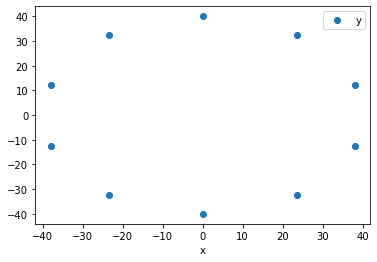

In [88]:
# Create ring of wells; export to wells.txt
origin = (0,0)
radius = 40 # m
split = 10
split_rot = 360/split
Q = 8*1e-3*86400 # L/s to m3/d

coords = []
for i in range(split):
    rot = (i+1)*split_rot
    coords.append(list(rotate(origin, (0,radius), math.radians(rot))))


df = pd.DataFrame(coords, columns=['x','y'])
df['Q'] = Q
df.plot(x='x', y='y', ls='', marker='o')

df.to_csv('wells.txt', index=False, sep='\t')
df


In [89]:
t = 50. # days
TheisField(t)

Reading model parameters ...
Reading well file ...
Calculating ...
Done.


In [90]:
head_change = pd.read_csv('head_change.csv')
head_change.head()

,x,y,dh
0,-500.0,-500.0,0.257823
1,-490.0,-500.0,0.259035
2,-480.0,-500.0,0.260247
3,-470.0,-500.0,0.261458
4,-460.0,-500.0,0.262668


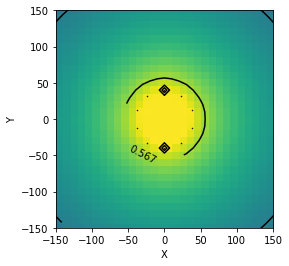

In [94]:
# Plot contour array

Z = head_change.pivot_table(index='x', columns='y', values='dh').T.values

X_unique = np.sort(head_change.x.unique())
Y_unique = np.sort(head_change.y.unique())
X, Y = np.meshgrid(X_unique, Y_unique)

fig = plt.figure()
ax = fig.add_subplot(111)

levels = np.linspace(0.1, 1.5, 10)
#import matplotlib.cm as cm # matplotlib's color map library
#cpf = ax.contourf(X,Y,Z, levels, cmap=cm.Reds)
line_colors = ['black' for l in levels]

# plots filled contour plot
ax.imshow(grid_z0.T, extent=(-500,500,-500,500), origin='lower')
ax.plot(df['x'].values, df['y'].values, 'k.', ms=1)
cp = ax.contour(X, Y, Z, levels=levels, colors=line_colors)
ax.clabel(cp, fontsize=10, colors=line_colors)
ax.set_xlim(-150,150)
ax.set_ylim(-150,150)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

In [65]:
X.shape

(10201, 10201)